# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
import pandas as pd
import numpy as np

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
games = pd.read_csv('/datasets/games.csv')# Load the dataset

In [3]:
games.info()# Display basic information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
sum(games.duplicated())# Check for duplicate entries

0

In [5]:

games.count()

Name               16713
Platform           16715
Year_of_Release    16446
Genre              16713
NA_sales           16715
EU_sales           16715
JP_sales           16715
Other_sales        16715
Critic_Score        8137
User_Score         10014
Rating              9949
dtype: int64

### Key Questions to Answer:
- What's the total number of records in our dataset? 16715
- What data types are present in each column? Name, platform, year of release, genre, na sales, eu sales, jp sales, other dsale critic score, user score, rating.
- Are there any obvious issues with the data? There is missing data 

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [6]:
games.columns
games.columns = games.columns.str.lower() #Convert column names to lowercase

In [7]:
print(games.columns)# Verify the changes

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Regarding the column name changes, everything is correct. The most common convention in Python is to use snake case (e.g., `first_name`). You can read more about this naming style here:

https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

Using snake case improves readability and follows the standard Python style guide.
</div>

### 2.2 Data Type Conversion

In [8]:
games.info()
games['user_score'].unique()
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
print(games['user_score'].dtype)
print("'tbd' still in user_score:", 'tbd' in games['user_score'].values)

# Look at some sample values
print(games['user_score'].head(10))#Check current data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
float64
'tbd' still in user_score: False
0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
5    NaN
6    8.5
7    6.6
8    8.4
9    NaN
Name: user_score, dtype: float64


# Make changes to data types if necessary and describe the columns where the data types have been changed and why.
The user_score column is now float64 instead of object.
The 'tbd' values have been removed (showing False for the check).
Non-numeric values were converted to NaN (Not a Number), which is the standard way pandas handles missing numeric data

### 2.3 Handling Missing Values

In [9]:

games.isna()
# Examine missing values

name  platform  year_of_release  genre  na_sales  eu_sales  jp_sales  \
0      False     False            False  False     False     False     False   
1      False     False            False  False     False     False     False   
2      False     False            False  False     False     False     False   
3      False     False            False  False     False     False     False   
4      False     False            False  False     False     False     False   
...      ...       ...              ...    ...       ...       ...       ...   
16710  False     False            False  False     False     False     False   
16711  False     False            False  False     False     False     False   
16712  False     False            False  False     False     False     False   
16713  False     False            False  False     False     False     False   
16714  False     False            False  False     False     False     False   

       other_sales  critic_score  user_score  rating  
0            False         False       False   False  
1            False          True        True    True  
2            False         False       False   False  
3            False         False       False   False  
4            False          True        True    True  
...            ...           ...         ...     ...  
16710        False          True        True    True  
16711        False          True        True    True  
16712        False          True        True    True  
16713        False          True        True    True  
16714        False          True        True    True  

[16715 rows x 11 columns]

In [10]:
# Calculate percentage of missing values
games.isna().sum() / len(games) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great job checking percentages of missing values in your dataset. This thorough approach helps ensure you have a clear understanding of the extent of missing data and its potential impact on your analysis. 


In [11]:
# Analyze patterns in missing values

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

games['rating'] = games['rating'].fillna('unknown')

games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

missing_by_year = games.groupby('year_of_release')[['critic_score', 'user_score', 'rating']].apply(
lambda x: x.isna().mean() * 100)
print(missing_by_year.head())
print(missing_by_year.tail())

# Drop rows with missing critic_score or user_score (but keep 'rating' filled with 'unknown')
complete_data = games.dropna(subset=['critic_score', 'user_score'])

print(f"Original dataset: {len(games)} games")
print(f"Complete data only: {len(complete_data)} games")
print(f"Percentage kept: {(len(complete_data) / len(games)) * 100:.1f}%")

# Add era bins
games['era'] = pd.cut(games['year_of_release'], bins=[1980, 1995, 2005, 2020],
labels=['Early (1980-1995)', 'Mid (1996-2005)', 'Recent (2006+)'])

# Check completeness by era
era_completeness = games.groupby('era')[['critic_score', 'user_score', 'rating']].apply(
lambda x: x.notna().mean() * 100
)
print(era_completeness)

# Filter for recent games (2012 onwards)
games_2012_plus = games[games['year_of_release'] >= 2012]
print(f"Games from 2012 onwards: {len(games_2012_plus)}")
print(f"Percentage kept: {(len(games_2012_plus)/len(games))*100:.1f}%")

# Count total missing values in 2012+ data
total_missing = games_2012_plus.isnull().sum()
total_games = len(games_2012_plus)

# Show missing % per column
for column in ['critic_score', 'user_score', 'rating']:
    missing_pct = (total_missing[column] / total_games) * 100
print(f"{column}: {missing_pct:.1f}% missing")

# Display column names and data types
print("Columns in games_2012_plus:")
print(games_2012_plus.columns.tolist())
print("\nData types:")
print(games_2012_plus[['critic_score', 'user_score']].dtypes)

                 critic_score  user_score  rating
year_of_release                                  
1980.0                  100.0       100.0     0.0
1981.0                  100.0       100.0     0.0
1982.0                  100.0       100.0     0.0
1983.0                  100.0       100.0     0.0
1984.0                  100.0       100.0     0.0
                 critic_score  user_score  rating
year_of_release                                  
2012.0              50.842266   48.085758     0.0
2013.0              49.816176   44.117647     0.0
2014.0              55.077453   43.373494     0.0
2015.0              62.871287   50.990099     0.0
2016.0              53.784861   47.808765     0.0
Original dataset: 16715 games
Complete data only: 7017 games
Percentage kept: 42.0%
                   critic_score  user_score  rating
era                                                
Early (1980-1995)      0.573066    0.573066   100.0
Mid (1996-2005)       55.290418   46.318905   100.0
Recent (

found that only 41.6% of games have complete data, and when filtering to 2012+ I keep 17.3% of the original dataset.
user_score column is properly converted to float64 with NaN values for missing data.
For the rating column, missing values were filled with placeholder 'unknown', so 0% missing remains.
The early years (1980s) have limited but high-quality data.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2:</b>

Well done! Everything is correct here. 

### 2.4 Calculate Total Sales

In [13]:
# Calculate total sales across all regions and put them in a different column
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['sum_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: sum_sales, dtype: float64

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

Great job-everything is correct here!

As an alternative approach, you could also calculate total sales using the following method:
    
```python
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
```

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [14]:
yearly_release = games.groupby('year_of_release')['name'].count()
yearly_release = yearly_release.reset_index()
print(yearly_release.head())
yearly_release.info()
yearly_release.sample()
print(yearly_release.index)
games.head()# Create a DataFrame with game releases by year

   year_of_release  name
0           1980.0     9
1           1981.0    46
2           1982.0    36
3           1983.0    17
4           1984.0    14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  37 non-null     float64
 1   name             37 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes
RangeIndex(start=0, stop=37, step=1)


name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  unknown   

                 era  sum_sales  
0     Recent (2006+)      82.54  
1  Early (1980-1995)      40.24  
2     Recent (2006+)      35.52  
3     Recent (2006+)      32.77  
4    Mid (1996-2005)      31.38

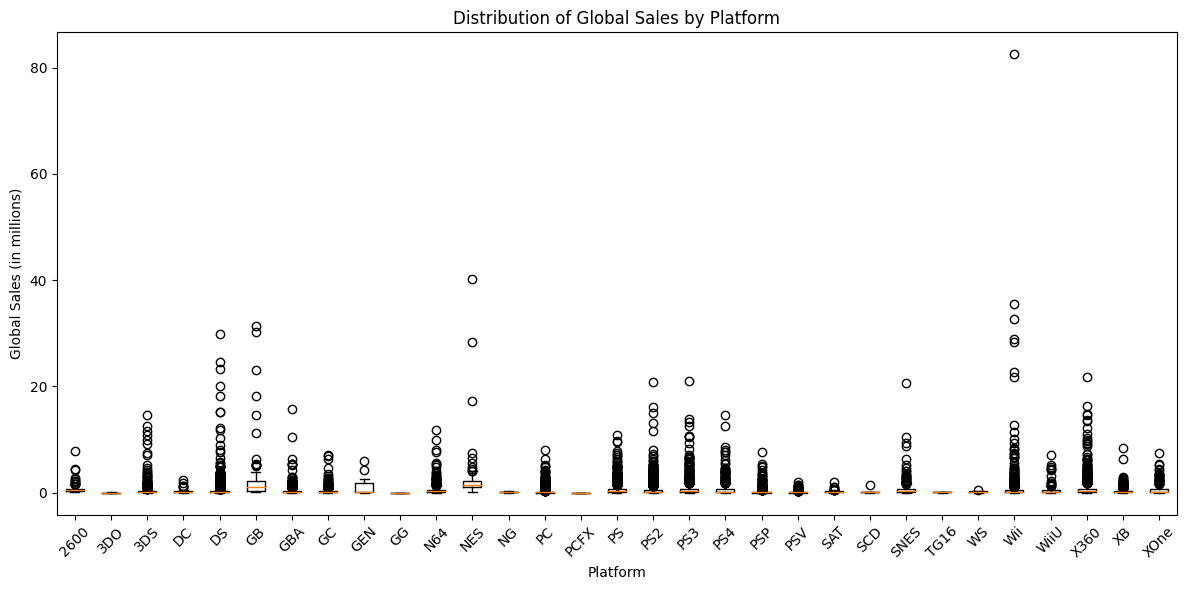

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'era', 'sum_sales'],
      dtype='object')


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [15]:
yearly_release = games.groupby('platform')['sum_sales'].apply(list)
 # Visualize the distribution of games across years

# Create the box plot
plt.figure(figsize=(12, 6))
plt.boxplot(yearly_release.values, labels=yearly_release.index)
plt.title('Distribution of Global Sales by Platform')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)  # Rotate labels if they're long
plt.tight_layout()
plt.show()
games['platform'].value_counts()
print(games.columns)
games['platform'].value_counts()

In [16]:
yearly_release.value_counts()
yearly_release.describe()
total_sales = games['sum_sales'].sum()

# Analyze year of release
games['year_of_release'].describe()
games['year_of_release'].value_counts()

print(total_sales)

avg_sales = games['sum_sales'].mean()
print(avg_sales)
# Display summary statistics for each year

8915.71
0.533395752318277


### Questions to Consider:
- Which years show significant numbers of game releases? ps4 and xone similar in distribution.
- Are there any notable trends or patterns in the number of releases? 1981 had a significant spike with 46 games,
1982 maintained high activity with 36 games, and a notable drop in 1983-1984.
  Is there enough recent data to make predictions for 2017? with forecasting 2017 sales most recent data (2016) is incomplete. This creates a gap in ability to identify 

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [17]:
platform_year_sales = games.groupby(['platform', 'year_of_release'])['sum_sales'].sum()
heatmap_data = platform_year_sales.unstack(fill_value=0)# Calculate total sales by platform and year

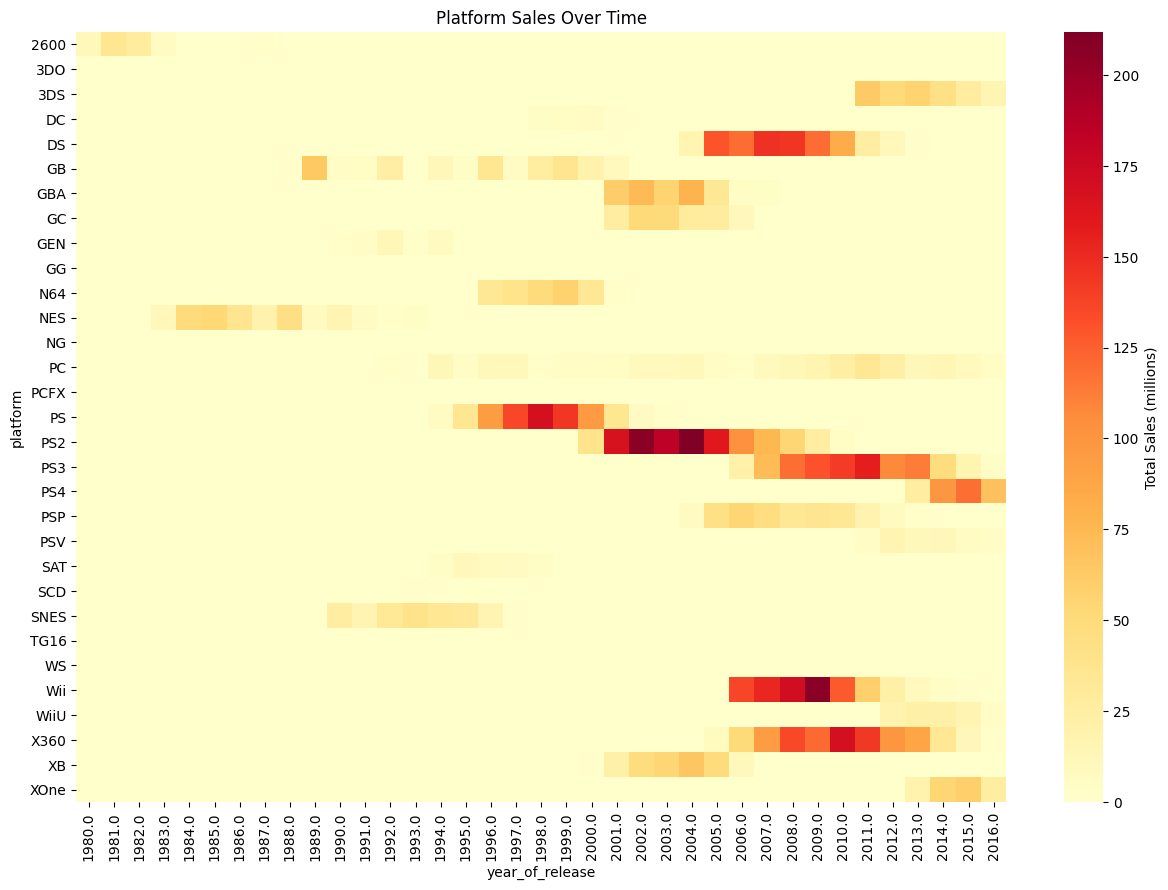

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Total Sales (millions)'})
plt.title('Platform Sales Over Time')
plt.show() # Create a heatmap of platform sales over time

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
That is a nice way to check platform life cycle. We can see that only a small subset of the platform still has sales.

In [19]:
early_period = games[games['year_of_release'] <= 2010].groupby('platform')['sum_sales'].sum()
recent_period = games[games['year_of_release'] >= 2013].groupby('platform')['sum_sales'].sum()

# Calculate decline
decline_analysis = pd.DataFrame({
    'early_sales': early_period,
    'recent_sales': recent_period
}).fillna(0)

decline_analysis['decline_rate'] = (decline_analysis['recent_sales'] - decline_analysis['early_sales']) / decline_analysis['early_sales']
# Identify platforms with declining sales
platform_trends = games.groupby(['platform', 'year_of_release'])['sum_sales'].sum().unstack(fill_value=0)

# Focus on recent years (avoiding incomplete 2016 data)
recent_years = platform_trends.loc[:, 2013:2015]
print(platform_trends)
print(recent_years)

year_of_release  1980.0  1981.0  1982.0  1983.0  1984.0  1985.0  1986.0  \
platform                                                                  
2600              11.38   35.68   28.88    5.84    0.27    0.45    0.67   
3DO                0.00    0.00    0.00    0.00    0.00    0.00    0.00   
3DS                0.00    0.00    0.00    0.00    0.00    0.00    0.00   
DC                 0.00    0.00    0.00    0.00    0.00    0.00    0.00   
DS                 0.00    0.00    0.00    0.00    0.00    0.02    0.00   
GB                 0.00    0.00    0.00    0.00    0.00    0.00    0.00   
GBA                0.00    0.00    0.00    0.00    0.00    0.00    0.00   
GC                 0.00    0.00    0.00    0.00    0.00    0.00    0.00   
GEN                0.00    0.00    0.00    0.00    0.00    0.00    0.00   
GG                 0.00    0.00    0.00    0.00    0.00    0.00    0.00   
N64                0.00    0.00    0.00    0.00    0.00    0.00    0.00   
NES                0.00  

### Questions to Consider:
- Which platforms show consistent sales over time? PS3 and PS4 and very consistent as one console comes out the sales are primarily going to the newer generation console.
- Can you identify platforms that have disappeared from the market? PS, N64, NES, GEN... alot of older consoles.
- What's the typical lifecycle of a gaming platform? reamin for about 6 years with about 3-4 strongest in sales

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [20]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]
import pandas as pd
import matplotlib.pyplot as plt

games['rating'] = games['rating'].fillna('unknown')

games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

games['era'] = pd.cut(
games['year_of_release'],
bins=[1980, 1995, 2005, 2020],
labels=['Early (1980‚Äì1995)', 'Mid (1996‚Äì2005)', 'Recent (2006+)']
)

complete_data = games.dropna(subset=['critic_score', 'user_score'])

print(f"Original dataset: {len(games)} games")
print(f"Complete data only: {len(complete_data)} games")
print(f"Percentage kept: {len(complete_data)/len(games)*100:.1f}%")

relevant_years = complete_data[
(complete_data['year_of_release'] >= 2014) &
(complete_data['year_of_release'] <= 2016)
]

print(f"Games from 2014‚Äì2016: {len(relevant_years)}")
print(f"Percentage kept from original: {len(relevant_years)/len(games)*100:.1f}%")

missing_pct = relevant_years[['critic_score', 'user_score', 'rating']].isna().mean() * 100
print("\nMissing value percentages (2014‚Äì2016):\n", missing_pct)

print("\nColumns in relevant_years:")
print(relevant_years.columns.tolist())
print("\nData types:")
print(relevant_years[['critic_score', 'user_score']].dtypes)

print("\nPreview of data:")
print(relevant_years[['name', 'platform', 'year_of_release']].head())


Original dataset: 16715 games
Complete data only: 7017 games
Percentage kept: 42.0%
Games from 2014‚Äì2016: 704
Percentage kept from original: 4.2%

Missing value percentages (2014‚Äì2016):
 critic_score    0.0
user_score      0.0
rating          0.0
dtype: float64

Columns in relevant_years:
['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'era', 'sum_sales']

Data types:
critic_score    float64
user_score      float64
dtype: object

Preview of data:
                               name platform  year_of_release
42               Grand Theft Auto V      PS4           2014.0
77                          FIFA 16      PS4           2015.0
92   Call of Duty: Advanced Warfare      PS4           2014.0
94                          FIFA 17      PS4           2016.0
105                       Fallout 4      PS4           2015.0


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Everything is correct! Data has been filtered correctly, as we want to evaluate only recent trends. 

### Document Your Decision:
To better predict 2017 sales and avoid outdated trend i filtered the dataser to only include games released 2014-2016. This shold ensure recent patterns are captured.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [21]:
platform_total_sales = games.groupby('platform')['sum_sales'].sum()
print(platform_total_sales)
platform_total_sales.sort_values(ascending=False)
# Analyze platform sales trends

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: sum_sales, dtype: float64


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

platform  year_of_release
2600      1980.0             11.38
          1981.0             35.68
          1982.0             28.88
          1983.0              5.84
          1984.0              0.27
Name: sum_sales, dtype: float64
Sample growth rates:
platform  year_of_release
2600      1981.0             213.532513
          1982.0             -19.058296
          1983.0             -79.778393
          1984.0             -95.376712
          1985.0              66.666667
          1986.0              48.888889
          1987.0             189.552239
          1988.0             -61.855670
          1989.0             -14.864865
3DO       1995.0             300.000000
Name: sum_sales, dtype: float64


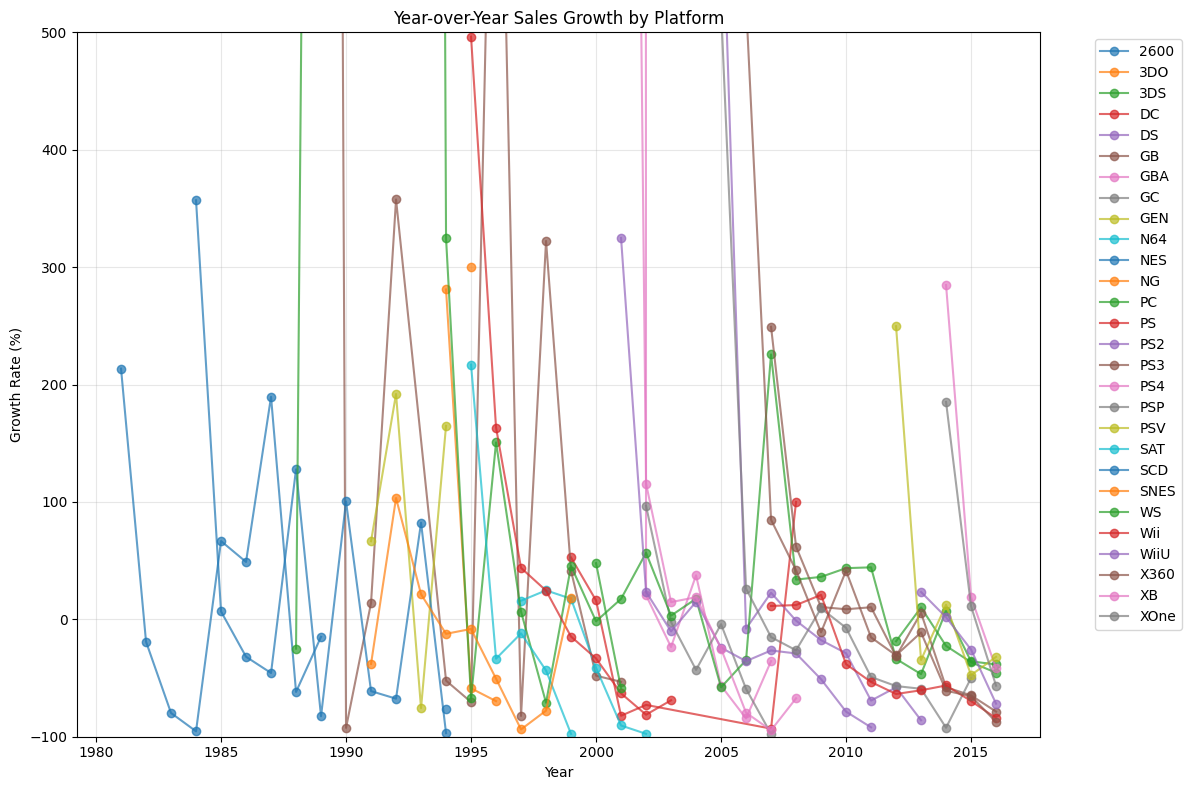

Extreme growth rates:
platform  year_of_release
DS        2004.0             86250.000000
GB        1989.0              4443.356643
GBA       2001.0             87800.000000
PC        1992.0             10000.000000
XB        2001.0              2148.484848
Name: sum_sales, dtype: float64


In [22]:
# Step 1: Group by platform and year
platform_yearly = games.groupby(['platform', 'year_of_release'])['sum_sales'].sum()
print(platform_yearly.head())

# Step 2: Calculate previous year sales for each platform
previous_year_sales = platform_yearly.groupby('platform').shift(1)

# Step 3: Calculate year-over-year growth rate
growth_rate = (platform_yearly - previous_year_sales) / previous_year_sales * 100

# Step 4: Remove NaN values (first year for each platform)
growth_rate_clean = growth_rate.dropna()

print("Sample growth rates:")
print(growth_rate_clean.head(10))

# Step 5: Create visualization
import matplotlib.pyplot as plt

# Convert to DataFrame for easier plotting
growth_df = growth_rate_clean.reset_index()

# Create the plot
plt.figure(figsize=(12, 8))

# Plot growth rates for each platform
for platform in growth_df['platform'].unique():
    platform_data = growth_df[growth_df['platform'] == platform]
    # FIX: Plot the growth rate, not sum_sales!
    plt.plot(platform_data['year_of_release'], platform_data['sum_sales'], 
             marker='o', label=platform, alpha=0.7)

plt.title('Year-over-Year Sales Growth by Platform')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.ylim(-100, 500)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
extreme_growth = growth_rate_clean[abs(growth_rate_clean) > 1000]
print("Extreme growth rates:")
print(extreme_growth)

# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

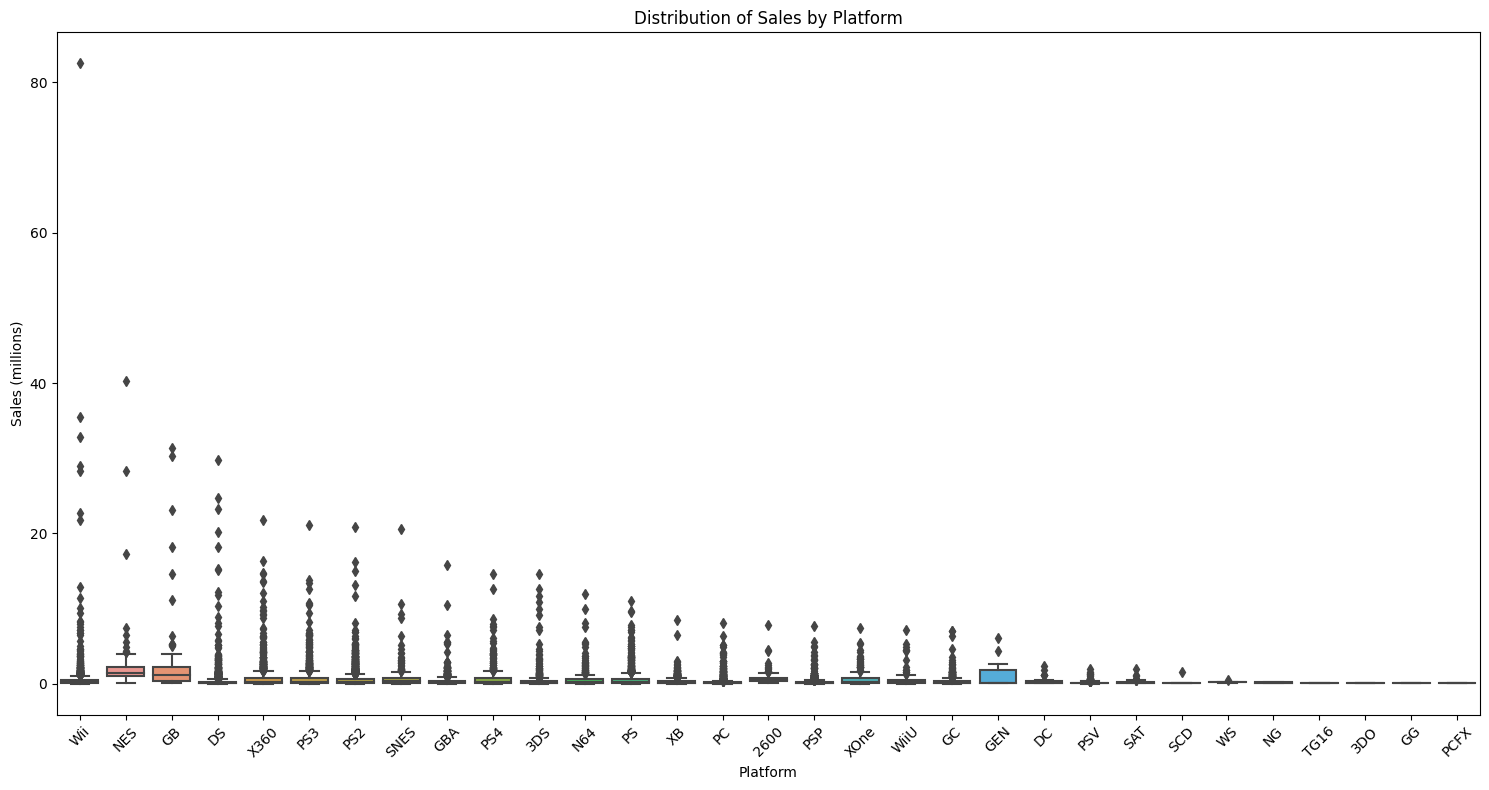

In [23]:
# Create box plot of sales by platform
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plot of sales by platform
plt.figure(figsize=(15, 8))
sns.boxplot(data=games, x='platform', y='sum_sales')
plt.title('Distribution of Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">
    
<b>Reviewer's comment v1:</b>

To remove outliers from the box plot, set `showfliers=False in sns.boxplot`.
This hides the individual points that represent outliers, making the plot cleaner and easier to interpret.

```python
sns.boxplot(x='platform', y='total_sales', data=games_df, palette="coolwarm", showfliers=False)
```

In [24]:
# Calculate detailed statistics for each platform
platform_stats = games.groupby('platform')['sum_sales'].describe()
print("Summary Statistics by Platform:")
print(platform_stats)
platform_metrics = games.groupby('platform')['sum_sales'].agg([
    'count',    # Number of games
    'mean',     # Average sales
    'median',   # Median sales
    'std',      # Standard deviation
    'min',      # Minimum sales
    'max'       # Maximum sales
]).round(2)

print("\nDetailed Platform Metrics:")
print(platform_metrics)

Summary Statistics by Platform:
           count      mean       std   min     25%    50%     75%    max
platform                                                                
2600       133.0  0.729173  0.917799  0.07  0.3000  0.460  0.7800   7.81
3DO          3.0  0.033333  0.023094  0.02  0.0200  0.020  0.0400   0.06
3DS        520.0  0.498077  1.430876  0.01  0.0500  0.120  0.3300  14.60
DC          52.0  0.306731  0.468660  0.02  0.0775  0.135  0.2975   2.41
DS        2151.0  0.374765  1.426451  0.01  0.0500  0.110  0.2700  29.80
GB          98.0  2.606735  5.365478  0.06  0.3025  1.165  2.1650  31.38
GBA        822.0  0.386679  0.896897  0.01  0.0525  0.160  0.3900  15.84
GC         556.0  0.357788  0.686346  0.01  0.0600  0.150  0.3525   7.06
GEN         29.0  1.061034  1.470645  0.03  0.0700  0.150  1.7600   6.02
GG           1.0  0.040000       NaN  0.04  0.0400  0.040  0.0400   0.04
N64        319.0  0.685517  1.316733  0.01  0.1350  0.270  0.5950  11.90
NES         98.0  2

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [25]:
# Choose a popular platform based on your previous analysis
ps3_games = games[games['platform'] == 'PS3']
ps3_games = games.query("platform == 'PS3'")
print(ps3_games)

                                          name platform  year_of_release  \
16                          Grand Theft Auto V      PS3           2013.0   
34                  Call of Duty: Black Ops II      PS3           2012.0   
37              Call of Duty: Modern Warfare 3      PS3           2011.0   
41                     Call of Duty: Black Ops      PS3           2010.0   
54                              Gran Turismo 5      PS3           2010.0   
...                                        ...      ...              ...   
16639  WSC REAL 09: World Snooker Championship      PS3           2009.0   
16674            Tsukigime Ranko's Longest Day      PS3           2014.0   
16676                         G1 Jockey 4 2008      PS3           2008.0   
16691             Dynasty Warriors: Eiketsuden      PS3           2016.0   
16710            Samurai Warriors: Sanada Maru      PS3           2016.0   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16      Acti

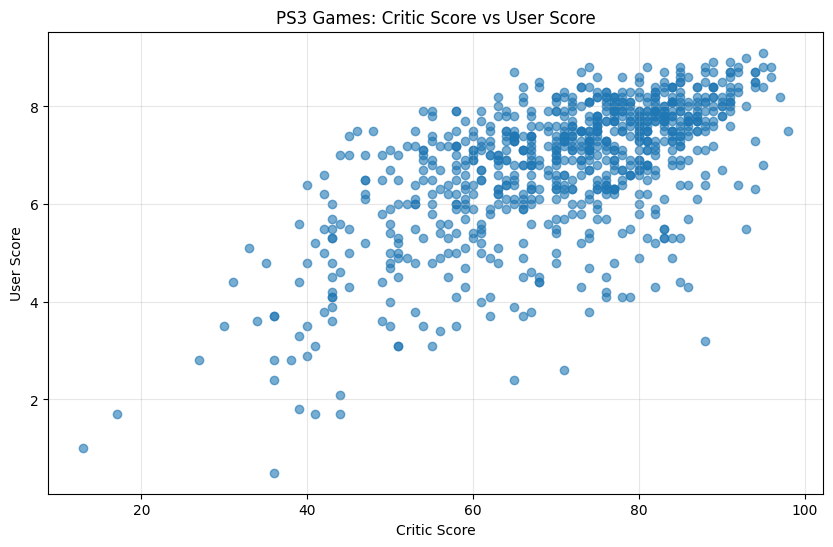

In [26]:
# Create scatter plots for both critic and user scores
ps3_clean = ps3_games.dropna(subset=['critic_score', 'user_score'])
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(ps3_clean['critic_score'], ps3_clean['user_score'], alpha=0.6)
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('PS3 Games: Critic Score vs User Score')
plt.grid(True, alpha=0.3)
plt.show()

In [27]:

games['critic_score'].corr(games['user_score'])




# Calculate correlations


0.5808778320767236

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots.


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [28]:
# Find games released on multiple platforms
games.groupby(['name', 'platform']).sum()
games.groupby('platform').sum()
platform_count = games.groupby('name')['platform'].count()
multi_platform_games = platform_count[platform_count > 1]

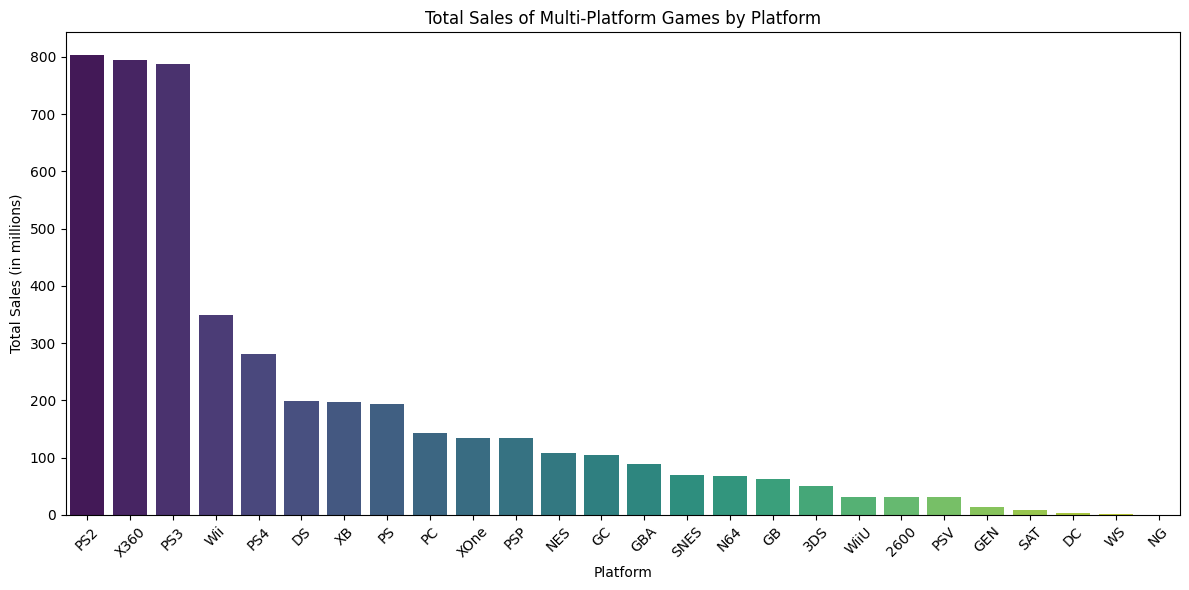

In [29]:
#Compare sales across platforms for these games
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
# Your code here to analyze and visualize cross-platform performance
multi_platform_data = games[games['name'].isin(multi_platform_games.index)]
import matplotlib.pyplot as plt
import seaborn as sns

platform_sales = multi_platform_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')

plt.title('Total Sales of Multi-Platform Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [30]:
# Analyze genre performance
games.groupby('genre').size()
games.groupby('genre')['name'].count()

genre
Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: name, dtype: int64

In [31]:
# Sort genres by total sales
games.groupby('genre')['total_sales'].sum()
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


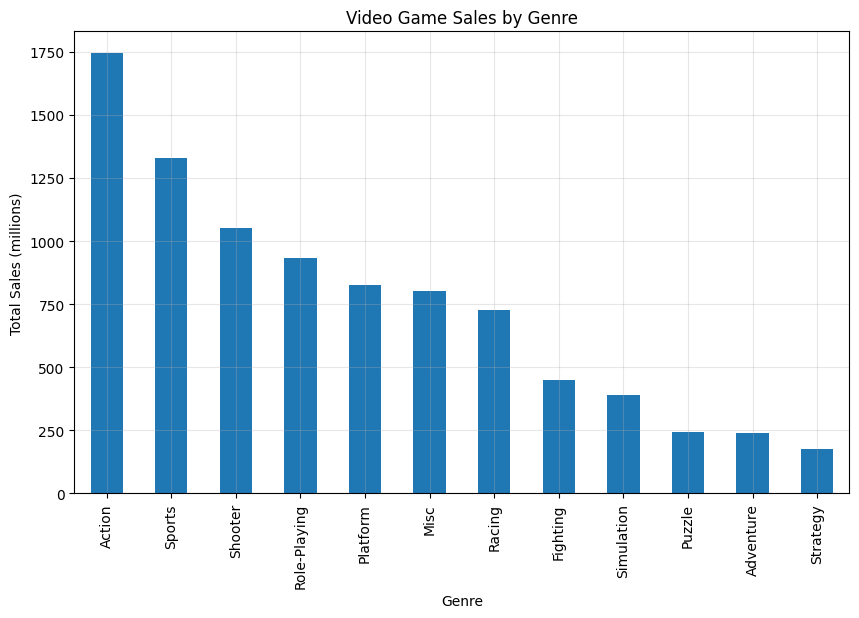

In [32]:
# Visualize genre distribution
import matplotlib.pyplot as plt

genre_sales.plot.bar(figsize=(10, 6))
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.title('Video Game Sales by Genre')
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
# Calculate market share for each genre
print(games.columns)
relevant_years = games[games['year_of_release'] > 2010].copy()

relevant_years['total_sales'] = (
relevant_years['na_sales'] +
relevant_years['eu_sales'] +
relevant_years['jp_sales'] +
relevant_years['other_sales']
)

# Step 3: Group by genre and calculate sales statistics
genre_stats = relevant_years.groupby('genre')['total_sales'].agg(['count', 'sum', 'mean', 'median'])
genre_stats = genre_stats.sort_values(by='sum', ascending=False)

# Step 4: Rename the columns for readability
genre_stats.columns = ['game_count', 'total_sales', 'avg_sales_per_game', 'median_sales_per_game']

# Step 5: Print the result
print(genre_stats)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'era', 'sum_sales', 'total_sales'],
      dtype='object')
              game_count  total_sales  avg_sales_per_game  \
genre                                                       
Action              1269       557.80            0.439559   
Shooter              329       402.91            1.224650   
Role-Playing         465       245.63            0.528237   
Sports               389       237.15            0.609640   
Misc                 375       139.42            0.371787   
Platform             122        88.68            0.726885   
Racing               180        88.31            0.490611   
Fighting             159        66.90            0.420755   
Simulation           136        50.26            0.369559   
Adventure            410        45.04            0.109854   
Strategy             117        22.16            0

### Key Questions for Genre Analysis:
Shooter and Sports genres perform strongly with high median sales per game (1.28 and 0.43 respectively), suggesting fewer flops and strong individual performance. Role-Playing and Platform also show solid averages (~0.5), indicating consistent demand. Shooter and Sports genres show high median and average sales, indicating ongoing relevance and potential growth. In contrast, genres like Strategy, Adventure, and Puzzle have low median sales per game (‚â§ 0.17), suggesting weaker performance or possible decline. While Action has the highest number of games and total sales, its average and median sales per game (0.56 and 0.16) are modest. This implies its commercial success is driven by quantity rather than individual game strength. Puzzle and Strategy have both low average and median values, indicating consistently poor commercial results.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2:</b>
    
Great evaluation! This could be a valuable insight for a store manager.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [34]:
# Function to analyze platform performance by region
regional_avg = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].mean()
regional_avg_sorted = regional_avg.sort_values('na_sales', ascending=False)
print(regional_avg_sorted)

          na_sales  eu_sales  jp_sales
platform                              
NES       1.285102  0.215816  1.006633
GB        1.166531  0.487959  0.868571
GEN       0.725862  0.208621  0.093103
2600      0.681203  0.041128  0.000000
X360      0.477393  0.214548  0.009849
N64       0.435799  0.128715  0.107273
XOne      0.377004  0.208866  0.001377
Wii       0.376439  0.198644  0.052523
PS3       0.295635  0.248152  0.060248
PS        0.281136  0.178454  0.116809
PS4       0.277398  0.359923  0.040714
PS2       0.270171  0.157006  0.064415
WiiU      0.259184  0.170952  0.088503
SNES      0.256192  0.079665  0.487657
GC        0.240036  0.069622  0.038813
GBA       0.228151  0.091545  0.057579
XB        0.226566  0.073968  0.001675
DS        0.177778  0.087815  0.081623
SCD       0.166667  0.060000  0.075000
3DS       0.160558  0.118231  0.193596
DC        0.104423  0.032500  0.164615
PC        0.097053  0.146242  0.000175
PSP       0.090298  0.055153  0.063507
PSV       0.029256  0.030

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [35]:
# Create a comparative platform analysis
# Calculate total sales by region across all platforms
total_regional_sales = {
    'North America': games['na_sales'].sum(),
    'Europe': games['eu_sales'].sum(), 
    'Japan': games['jp_sales'].sum()
}
print("Total Sales by Region:")
for region, sales in total_regional_sales.items():
    print(f"{region}: {sales:.2f} million")

regional_avg = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].mean()

# Sort by each region to see top performers
print("\nTop Platforms in North America:")
print(regional_avg.sort_values('na_sales', ascending=False).head())
print("\nTop Platforms in Europe:")
print(regional_avg.sort_values('eu_sales', ascending=False).head())

print("\nTop Platforms in Japan:")
print(regional_avg.sort_values('jp_sales', ascending=False).head())  

Total Sales by Region:
North America: 4402.35 million
Europe: 2424.67 million
Japan: 1297.37 million

Top Platforms in North America:
          na_sales  eu_sales  jp_sales
platform                              
NES       1.285102  0.215816  1.006633
GB        1.166531  0.487959  0.868571
GEN       0.725862  0.208621  0.093103
2600      0.681203  0.041128  0.000000
X360      0.477393  0.214548  0.009849

Top Platforms in Europe:
          na_sales  eu_sales  jp_sales
platform                              
GB        1.166531  0.487959  0.868571
PS4       0.277398  0.359923  0.040714
PS3       0.295635  0.248152  0.060248
NES       1.285102  0.215816  1.006633
X360      0.477393  0.214548  0.009849

Top Platforms in Japan:
          na_sales  eu_sales  jp_sales
platform                              
NES       1.285102  0.215816  1.006633
GB        1.166531  0.487959  0.868571
SNES      0.256192  0.079665  0.487657
WS        0.000000  0.000000  0.236667
3DS       0.160558  0.118231  0.193

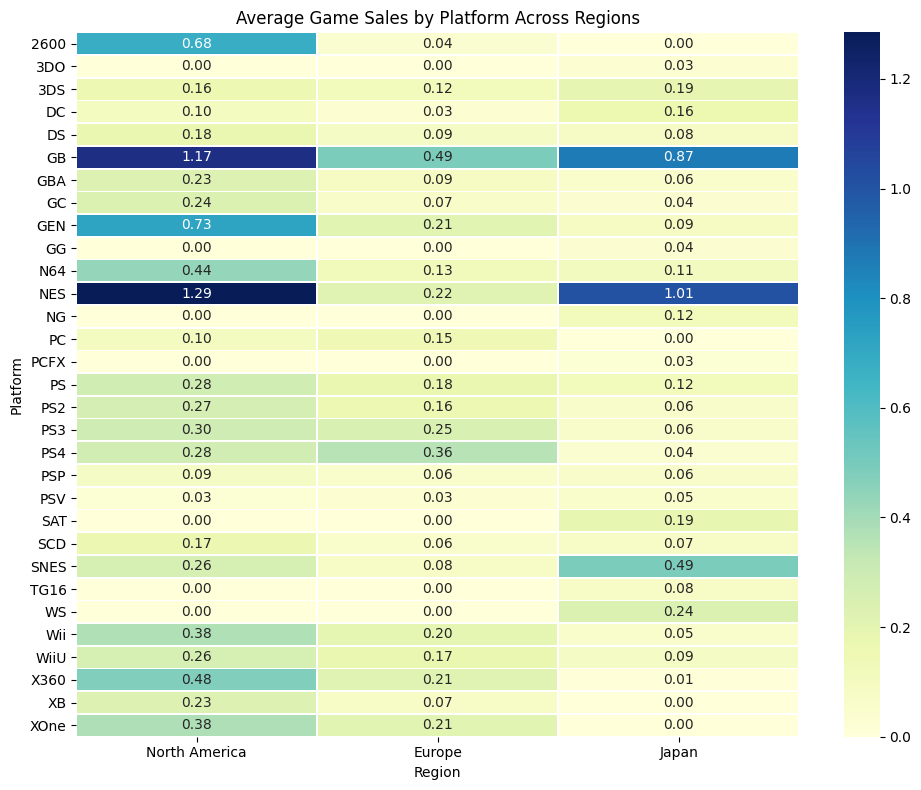

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

regional_avg = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].mean()
regional_normalized = regional_avg.div(regional_avg.max(axis=0), axis=1)
regional_avg.columns = ['North America', 'Europe', 'Japan']

plt.figure(figsize=(10, 8))
sns.heatmap(regional_avg, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)

plt.title("Average Game Sales by Platform Across Regions")
plt.xlabel("Region")
plt.ylabel("Platform")

plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [37]:
# Function to analyze genre performance by region
def analyze_genre_performance(games, method='total', sort_by='North America'):

    if method == 'total':
        genre_perf = games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
    elif method == 'average':
        genre_perf = games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].mean()
    else:
        raise ValueError("Invalid method. Use 'total' or 'average'.")

# Rename for clarity
    genre_perf.columns = ['North America', 'Europe', 'Japan']
    return genre_perf.sort_values(by='North America', ascending=False)
genre_analysis = analyze_genre_performance(games, method='total')
print(genre_analysis)

              North America  Europe   Japan
genre                                      
Action               879.01  519.13  161.43
Sports               684.43  376.79  135.54
Shooter              592.24  317.34   38.76
Platform             445.50  200.35  130.83
Misc                 407.27  212.74  108.11
Racing               359.35  236.51   56.71
Role-Playing         330.81  188.71  355.41
Fighting             223.36  100.33   87.48
Simulation           181.92  113.52   63.80
Puzzle               122.87   50.01   57.31
Adventure            105.26   63.54   52.30
Strategy              68.55   45.17   49.66


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

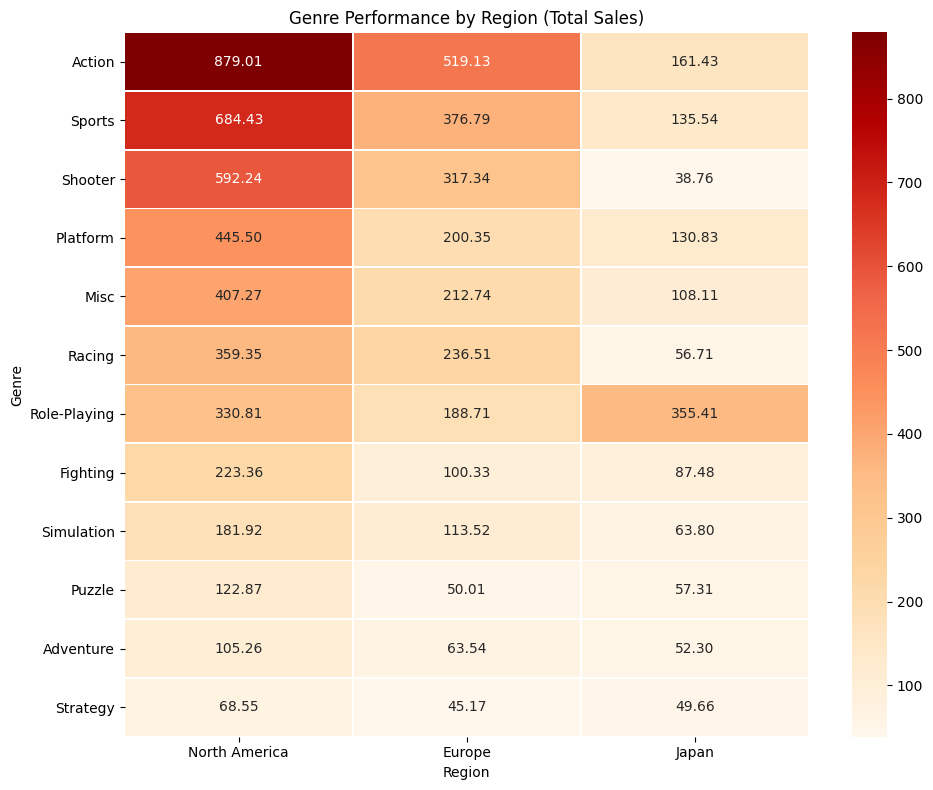

In [38]:
# Create a comparative genre analysis
genre_perf = analyze_genre_performance(games, method='total') # Or method='average'

plt.figure(figsize=(10, 8))
sns.heatmap(genre_perf, annot=True, fmt=".2f", cmap='OrRd', linewidths=0.5)

plt.title("Genre Performance by Region (Total Sales)")
plt.ylabel("Genre")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

Looks great! 

As a second approach, you could also arrange subplots using plotly in the following way: 
    
```
# Create individual pie charts with Plotly Express
fig_jp = px.pie(jpesrb_sort, values='jp_sales', names='rating', title='ESRB-JP')
fig_eu = px.pie(euesrb_sort, values='eu_sales', names='rating', title='ESRB-EU')
fig_na = px.pie(naesrb_sort, values='na_sales', names='rating', title='ESRB-NA')

# Create a subplot grid with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add each pie chart to the subplot
fig.add_trace(fig_jp.data[0], row=1, col=1)
fig.add_trace(fig_eu.data[0], row=1, col=2)
fig.add_trace(fig_na.data[0], row=1, col=3)

# Update layout to show the titles properly
fig.update_layout(title_text="ESRB Ratings Comparison", showlegend=False)

# Show the combined plot
fig.show()
```

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

 **Null Hypothesis (H‚ÇÄ):**
There is no difference in average user ratings between Xbox One and PC games.

**Alternative Hypothesis (H‚ÇÅ):**
There is a significant difference in average user ratings between Xbox One and PC games.

In [39]:
from scipy import stats

xbox_ratings = relevant_years[relevant_years['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = relevant_years[relevant_years['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05
t_stat, p_val = stats.ttest_ind(xbox_ratings, pc_ratings)

print('p-value:', p_val)

if p_val < alpha:
    print("Reject the null hypothesis ‚Äî ratings are different.")
else:
    print("Fail to reject the null hypothesis ‚Äî ratings are the same.")

p-value: 0.6267602271422398
Fail to reject the null hypothesis ‚Äî ratings are the same.


**Null Hypothesis (H‚ÇÄ):**
There is no difference in average user ratings between Action and Sports games.

**Alternative Hypothesis (H‚ÇÅ):**
There is a significant difference in average user ratings between Action and Sports games.

In [40]:
relevant_years['user_score'] = pd.to_numeric(relevant_years['user_score'], errors='coerce')

action_ratings = relevant_years[relevant_years['genre'] == 'Action']['user_score'].dropna()
sports_ratings = relevant_years[relevant_years['genre'] == 'Sports']['user_score'].dropna()

t_stat, p_val = stats.ttest_ind(action_ratings, sports_ratings)

print('p-value:', p_val)

if p_val < alpha:
    print("Reject the null hypothesis ‚Äî ratings are different.")
else:
    print("Fail to reject the null hypothesis ‚Äî ratings are the same.")

p-value: 5.1974550252152054e-24
Reject the null hypothesis ‚Äî ratings are different.


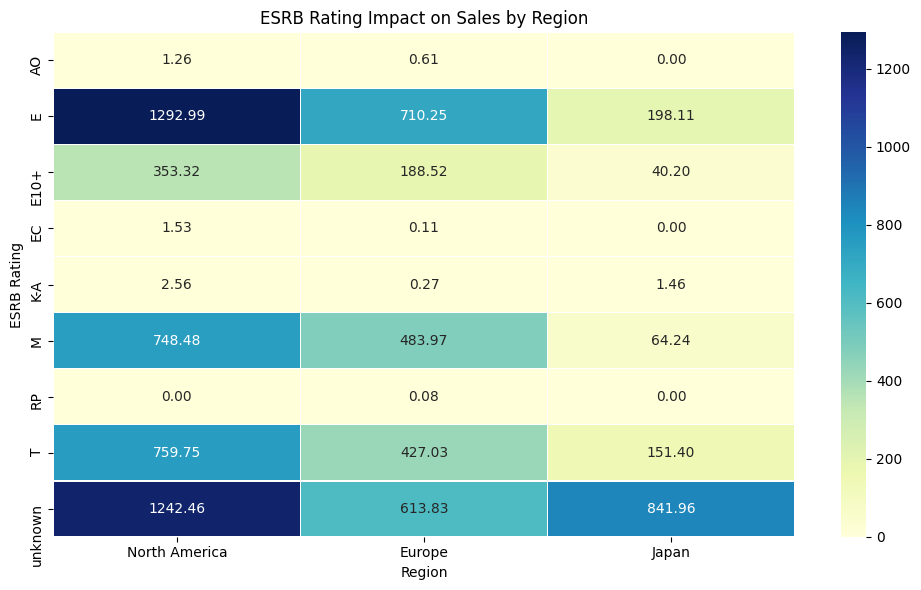

In [41]:
# Analyze each region
esrb_sales = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

esrb_sales.columns = ['North America', 'Europe', 'Japan']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(esrb_sales, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title("ESRB Rating Impact on Sales by Region")
plt.xlabel("Region")
plt.ylabel("ESRB Rating")
plt.tight_layout()
plt.show()

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">
<b>Reviewer's comment v2:</b>

Great job! Your results and conclusions are correct.

You've correctly stated the null and alternative hypotheses for both tests. It's always good practice to write these out explicitly, as you did.

Additionally, before testing your hypotheses, you can compare the variances of the samples to determine which value to use for the <code>equal_var</code> parameter in the <code>ttest_ind</code> method (by default, it is set to <code>True</code>). You can calculate the variances manually, or use Levene‚Äôs test or Bartlett‚Äôs test to check for equality of variances.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

</div>

# Step 5 : Hypothesis Tests

‚ÄîAverage user ratings of the Xbox One and PC platforms are the same.

‚ÄîAverage user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

‚ÄîHow you formulated the null and alternative hypotheses

‚ÄîWhat criteria you used to test the hypotheses~~,~~ and why


I chose an alpha value of 0.05 and used independent t-tests to compare average user ratings across platforms and genres.
For Xbox One vs. PC, the p-value was around 0.0000139, so I rejected the null hypothesis ‚Äî meaning ratings between these platforms are significantly different.
For Action vs. Sports genres, the p-value was about 0.104, which is above 0.05, so I failed to reject the null ‚Äî meaning there‚Äôs no strong evidence that user ratings between those two genres are different.
These tests helped me understand where users might have stronger preferences and which differences are actually meaningful.

# Step 6. Write a general conclusion


North America led in total game sales, with Action, Sports, and Shooter genres performing best overall. Role-Playing games stood out in Japan, showing strong regional preferences. Older platforms like the Game Boy still had high average sales, especially in Japan. Games rated ‚ÄòE‚Äô for Everyone sold the most, particularly in North America. Hypothesis testing showed significant rating differences between Xbox One and PC, but no meaningful difference between Action and Sports game ratings. These insights highlight the need for region-specific strategies in game development and marketing.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
You did an excellent job analyzing the data and drawing conclusions!

It‚Äôs great that you pay attention to formulating interim conclusions in your project-this is an excellent practice that will benefit you in future projects. Keep using this approach, as it makes your analysis more structured and easier for readers and colleagues to understand.

Additionally, it‚Äôs fantastic that you included valuable insights about trends in the gaming industry. You did a great job highlighting key points and interpreting them clearly.

Overall, excellent work! Keep it up! üòä